First we configure the notebook so we can use auto-completion.

In [1]:
%config Completer.use_jedi = False

Then we can import all relations utilities.

In [2]:
from mcda.core.relations import *
from mcda.outranking.utils import *
from mcda.plot.plot import plot_relation

# Relations

In the package, a relation `aXb` is defined by a tuple of three elements:
* the first element of the relation `a`
* the second element of the relation `b`
* the relation type `X` (`P`, `I`, `R`)

The types of relations are contained in the enumeration `RelationType`.

In [3]:
list(RelationType)

[<RelationType.PREFERENCE: 1>,
 <RelationType.INDIFFERENCE: 2>,
 <RelationType.INCOMPARABLE: 3>]

So you can easily create relations and bundle them in a list:

In [4]:
relations0 = [
    (0, 1, RelationType.PREFERENCE),
    (0, 1, RelationType.INCOMPARABLE),
    (0, 0, RelationType.INDIFFERENCE),
    (0, 0, RelationType.PREFERENCE)
]

You can check a relation's validity w.r.t the reflexivity property of its relation type.

In [5]:
for r in relations0:
    print(f"{r} valid => {valid(r)}")

(0, 1, <RelationType.PREFERENCE: 1>) valid => True
(0, 1, <RelationType.INCOMPARABLE: 3>) valid => True
(0, 0, <RelationType.INDIFFERENCE: 2>) valid => True
(0, 0, <RelationType.PREFERENCE: 1>) valid => False


# Relations comparisons

## Compare relations elements pairs

In [6]:
same_alternatives(relations0[0], relations0[1])

True

## Equality

Two relations are equal if they have the same relation type, and same meaning (w.r.t the relation type symmetry property).

In [7]:
equal(
    (1, 0, RelationType.PREFERENCE),
    (1, 0, RelationType.PREFERENCE)
)

True

Indifference and incomparable relations are symmetric.

In [8]:
equal(
    (1, 0, RelationType.INDIFFERENCE),
    (0, 1, RelationType.INDIFFERENCE)
)

True

In [9]:
equal(
    (1, 0, RelationType.INCOMPARABLE),
    (0, 1, RelationType.INCOMPARABLE)
)

True

Preference relations though are antisymmetric.

In [10]:
equal(
    (1, 0, RelationType.PREFERENCE),
    (0, 1, RelationType.PREFERENCE)
)

False

Of course relations that don't involve the same elements cannot be equal.

In [11]:
equal(
    (1, 0, RelationType.INDIFFERENCE),
    (0, 2, RelationType.INDIFFERENCE)
)

False

## Compatibility of relations

We can check if two relations are compatible i.e their union can coexist.

This is the case if they don't involve the same pair of elements.

In [12]:
compatible(
    (0, 1, RelationType.PREFERENCE),
    (0, 2, RelationType.INDIFFERENCE)
)

True

But also if they are equal (they are redundant but compatible).

In [13]:
compatible(
    (0, 1, RelationType.PREFERENCE),
    (0, 1, RelationType.PREFERENCE)
)

True

In [14]:
compatible(
    (1, 0, RelationType.INDIFFERENCE),
    (0, 1, RelationType.INDIFFERENCE)
)

True

Two different relations on the same elements pair are incompatible.

In [15]:
compatible(
    (0, 1, RelationType.PREFERENCE),
    (1, 0, RelationType.INDIFFERENCE)
)

False

In [16]:
compatible(
    (1, 0, RelationType.PREFERENCE),
    (0, 1, RelationType.PREFERENCE)
)

False

# Relations list operations

We can simply create a relations structure by bundling all relations in a list.

In [17]:
relations = [
    (1, 0, RelationType.INDIFFERENCE),
    (0, 2, RelationType.PREFERENCE),
    (2, 4, RelationType.PREFERENCE),
    (4, 3, RelationType.INDIFFERENCE),
    (4, 5, RelationType.PREFERENCE),
    (5, 6, RelationType.INCOMPARABLE),
]

We can plot the relations:

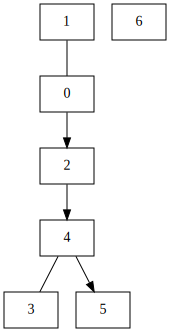

In [18]:
plot_relation(relations)

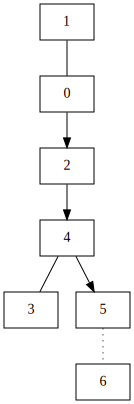

In [19]:
plot_relation(
    relations,
    [
        RelationType.PREFERENCE,
        RelationType.INDIFFERENCE,
        RelationType.INCOMPARABLE
    ]
)

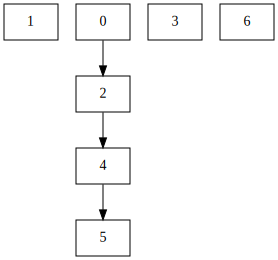

In [20]:
plot_relation(
    relations,
    [RelationType.PREFERENCE]
)

## Relation membership

In [21]:
in_relations((0, 1, RelationType.INDIFFERENCE), relations)

True

## Elements list

In [22]:
elements(relations)

[0, 1, 2, 3, 4, 5, 6]

## Relation between elements (if existing)

In [23]:
relation(2, 0, relations)

(0, 2, <RelationType.PREFERENCE: 1>)

In [24]:
print(relation(7, 1, relations))

None


## Relations of an element

In [25]:
alternative_relations(4, relations)

[(2, 4, <RelationType.PREFERENCE: 1>),
 (4, 3, <RelationType.INDIFFERENCE: 2>),
 (4, 5, <RelationType.PREFERENCE: 1>)]

## Typed relations

In [26]:
relations_typed(RelationType.PREFERENCE, relations)

[(0, 2, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (4, 5, <RelationType.PREFERENCE: 1>)]

## Check elements pairs unicity

We can check that an elements pair is not present multiple times in the relations structure.

**N.B: It does not check relations' validity!**

In [27]:
relations_pair_unicity(relations)

True

In [28]:
relations_pair_unicity(relations + [(0, 1, RelationType.INDIFFERENCE)])

False

## Check preference structure

We can check the relations structure defines a valid preference structure w.r.t the relation type properties.

In [29]:
is_preference_structure(relations)

True

In [30]:
is_preference_structure([(1, 1, RelationType.PREFERENCE)])

False

In [31]:
is_preference_structure(relations + [(0, 1, RelationType.PREFERENCE)])

False

## Check if relations define a total preorder

In [32]:
is_total_preorder(relations)

False

In [33]:
relations1 = [
    (1, 0, RelationType.INDIFFERENCE),
    (0, 2, RelationType.PREFERENCE),
    (2, 4, RelationType.PREFERENCE),
    (4, 3, RelationType.INDIFFERENCE),
    (4, 5, RelationType.PREFERENCE),
]

In [34]:
is_total_preorder(relations1)

True

## Check if relations define a total order

In [35]:
is_total_order(relations1)

False

In [36]:
relations1 = [
    (0, 2, RelationType.PREFERENCE),
    (2, 4, RelationType.PREFERENCE),
    (4, 5, RelationType.PREFERENCE),
]
is_total_order(relations1)

True

In [37]:
relations1 = [
    (0, 2, RelationType.PREFERENCE),
    (2, 0, RelationType.PREFERENCE),
    (4, 5, RelationType.PREFERENCE),
]
is_total_order(relations1)

False

In [38]:
relations1 = [
    (0, 2, RelationType.PREFERENCE),
    (4, 5, RelationType.PREFERENCE),
]
is_total_order(relations1)

False

In [39]:
relations1 = [
    (1, 0, RelationType.INDIFFERENCE),
    (0, 2, RelationType.PREFERENCE),
    (4, 3, RelationType.INDIFFERENCE),
    (4, 5, RelationType.PREFERENCE),
]
is_total_preorder(relations1)

False

## Add all transitive relations

In [40]:
res = add_transitivity(relations)
res

[(0, 1, <RelationType.INDIFFERENCE: 2>),
 (0, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.PREFERENCE: 1>),
 (0, 4, <RelationType.PREFERENCE: 1>),
 (0, 5, <RelationType.PREFERENCE: 1>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 2, <RelationType.PREFERENCE: 1>),
 (1, 3, <RelationType.PREFERENCE: 1>),
 (1, 4, <RelationType.PREFERENCE: 1>),
 (1, 5, <RelationType.PREFERENCE: 1>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 3, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.PREFERENCE: 1>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (3, 5, <RelationType.PREFERENCE: 1>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]

## Remove all transitive relations

This function actually computes a condensed graph from the relations list, the compute transitive reduction on it.

**This means the elements of the relation structure could be bundled together in categories!**

In [41]:
remove_transitivity(res)

[((3, 4), (5,), <RelationType.PREFERENCE: 1>),
 ((5,), (2,), <RelationType.INCOMPARABLE: 3>),
 ((5,), (0, 1), <RelationType.INCOMPARABLE: 3>),
 ((5,), (6,), <RelationType.INCOMPARABLE: 3>),
 ((2,), (3, 4), <RelationType.PREFERENCE: 1>),
 ((3, 4), (0, 1), <RelationType.INCOMPARABLE: 3>),
 ((3, 4), (6,), <RelationType.INCOMPARABLE: 3>),
 ((0, 1), (2,), <RelationType.PREFERENCE: 1>),
 ((2,), (6,), <RelationType.INCOMPARABLE: 3>),
 ((0, 1), (6,), <RelationType.INCOMPARABLE: 3>)]

# Outranking matrices

We can convert the relations list to an outranking matrix.

N.B: this representation expects no incomparable relations and will remove them

In [42]:
mat = relations_to_matrix(relations)
mat

0  1  2  3  4  5  6
0  1  1  1  0  0  0  0
1  1  1  0  0  0  0  0
2  0  0  1  0  1  0  0
3  0  0  0  1  1  0  0
4  0  0  0  1  1  1  0
5  0  0  0  0  0  1  0
6  0  0  0  0  0  0  1

We can of course convert back:

In [43]:
matrix_to_relations(mat)

[(0, 1, <RelationType.INDIFFERENCE: 2>),
 (0, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.INCOMPARABLE: 3>),
 (0, 4, <RelationType.INCOMPARABLE: 3>),
 (0, 5, <RelationType.INCOMPARABLE: 3>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 2, <RelationType.INCOMPARABLE: 3>),
 (1, 3, <RelationType.INCOMPARABLE: 3>),
 (1, 4, <RelationType.INCOMPARABLE: 3>),
 (1, 5, <RelationType.INCOMPARABLE: 3>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 3, <RelationType.INCOMPARABLE: 3>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.INCOMPARABLE: 3>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (3, 5, <RelationType.INCOMPARABLE: 3>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]

## Transitive closure

We can compute the transitive closure of the graph represented by the matrix.

In [44]:
trans_mat = transitive_closure(mat)
trans_mat

0  1  2  3  4  5  6
0  1  1  1  1  1  1  0
1  1  1  1  1  1  1  0
2  0  0  1  1  1  1  0
3  0  0  0  1  1  1  0
4  0  0  0  1  1  1  0
5  0  0  0  0  0  1  0
6  0  0  0  0  0  0  1

## Transitive reduction

We can compute the transitive reduction of the matrix. This is the general version of the function that makes no assumptions on the graph (cyclic graphs are accepted). However to remove potential cycles, elements may be bundled together to obtain an acyclic graph in the end.

In [45]:
new_matrix = transitive_reduction_matrix(trans_mat)
new_matrix

(5,)  (3, 4)  (2,)  (0, 1)  (6,)
(5,)       0       0     0       0     0
(3, 4)     1       0     0       0     0
(2,)       0       1     0       0     0
(0, 1)     0       0     1       0     0
(6,)       0       0     0       0     0

We can convert back to see what relations it represents (note the presence of incomparable relations though they are redundant in the traditional model).

In [46]:
matrix_to_relations(new_matrix)

[((3, 4), (5,), <RelationType.PREFERENCE: 1>),
 ((5,), (2,), <RelationType.INCOMPARABLE: 3>),
 ((5,), (0, 1), <RelationType.INCOMPARABLE: 3>),
 ((5,), (6,), <RelationType.INCOMPARABLE: 3>),
 ((2,), (3, 4), <RelationType.PREFERENCE: 1>),
 ((3, 4), (0, 1), <RelationType.INCOMPARABLE: 3>),
 ((3, 4), (6,), <RelationType.INCOMPARABLE: 3>),
 ((0, 1), (2,), <RelationType.PREFERENCE: 1>),
 ((2,), (6,), <RelationType.INCOMPARABLE: 3>),
 ((0, 1), (6,), <RelationType.INCOMPARABLE: 3>)]

We can plot the relations to see how it looks.

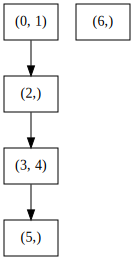

In [47]:
plot_relation(
    matrix_to_relations(new_matrix),
    relation_types=[RelationType.PREFERENCE, RelationType.INDIFFERENCE]
)

If we need to, we can replace the indexes of the outranking matrix by single labels that concatenate the labels of the elements in each category:

In [48]:
from collections import OrderedDict
categories = OrderedDict(
    (", ".join([str(a) for a in cat]), cat) for cat in new_matrix.index.tolist()
)
categories

OrderedDict([('5', (5,)),
             ('3, 4', (3, 4)),
             ('2', (2,)),
             ('0, 1', (0, 1)),
             ('6', (6,))])

**N.B: note the use of an `OrderedDict` to make sure the labels are replaced in the same order.**

In [49]:
new_matrix.index = categories.keys()
new_matrix.columns = categories.keys()
new_matrix

5  3, 4  2  0, 1  6
5     0     0  0     0  0
3, 4  1     0  0     0  0
2     0     1  0     0  0
0, 1  0     0  1     0  0
6     0     0  0     0  0

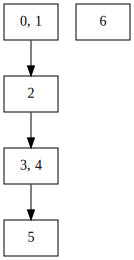

In [50]:
plot_relation(
    matrix_to_relations(new_matrix),
    relation_types=[RelationType.PREFERENCE, RelationType.INDIFFERENCE]
)

# Sort relations

There can be multiple ways to sort relations in a structure.

In [51]:
from mcda.core.sets import *

## Lexicographic order

In [52]:
alts = sorted(elements(res))
alts

[0, 1, 2, 3, 4, 5, 6]

In [53]:
from itertools import product

In [54]:
sets = [(a, b) for a, b in product(alts, alts)]

In [55]:
sorted(
    res, 
    key=lambda r: (
        sets.index(r[:-1])
    )
)

[(0, 1, <RelationType.INDIFFERENCE: 2>),
 (0, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.PREFERENCE: 1>),
 (0, 4, <RelationType.PREFERENCE: 1>),
 (0, 5, <RelationType.PREFERENCE: 1>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 2, <RelationType.PREFERENCE: 1>),
 (1, 3, <RelationType.PREFERENCE: 1>),
 (1, 4, <RelationType.PREFERENCE: 1>),
 (1, 5, <RelationType.PREFERENCE: 1>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 3, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.PREFERENCE: 1>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (3, 5, <RelationType.PREFERENCE: 1>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]

## Cardinality of its elements

In [56]:
sets = [s for s in cardinal_range(complete_set(len(alts))) if 0 < cardinality(s) <= 2]

In [57]:
sorted(
    res, 
    key=lambda r: (
        sets.index(
            set_to_index(set(r[:-1]), alts)
        )
    )
)

[(0, 1, <RelationType.INDIFFERENCE: 2>),
 (0, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.PREFERENCE: 1>),
 (0, 4, <RelationType.PREFERENCE: 1>),
 (0, 5, <RelationType.PREFERENCE: 1>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 2, <RelationType.PREFERENCE: 1>),
 (1, 3, <RelationType.PREFERENCE: 1>),
 (1, 4, <RelationType.PREFERENCE: 1>),
 (1, 5, <RelationType.PREFERENCE: 1>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 3, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.PREFERENCE: 1>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (3, 5, <RelationType.PREFERENCE: 1>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]

## Relation type and cardinality of elements

In [58]:
sorted(
    res, 
    key=lambda r: (
        r[2].value, 
        sets.index(
            set_to_index(set(r[:-1]), alts)
        )
    )
)

[(0, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.PREFERENCE: 1>),
 (0, 4, <RelationType.PREFERENCE: 1>),
 (0, 5, <RelationType.PREFERENCE: 1>),
 (1, 2, <RelationType.PREFERENCE: 1>),
 (1, 3, <RelationType.PREFERENCE: 1>),
 (1, 4, <RelationType.PREFERENCE: 1>),
 (1, 5, <RelationType.PREFERENCE: 1>),
 (2, 3, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.PREFERENCE: 1>),
 (3, 5, <RelationType.PREFERENCE: 1>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (0, 1, <RelationType.INDIFFERENCE: 2>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]

## Elements pair order (as binary mask)

In [59]:
sets = [s for s in range(complete_set(len(alts))) if 0 < cardinality(s) <= 2]
sorted(
    res, 
    key=lambda r: (
        sets.index(
            set_to_index(set(r[:-1]), alts)
        )
    )
)

[(0, 1, <RelationType.INDIFFERENCE: 2>),
 (0, 2, <RelationType.PREFERENCE: 1>),
 (1, 2, <RelationType.PREFERENCE: 1>),
 (0, 3, <RelationType.PREFERENCE: 1>),
 (1, 3, <RelationType.PREFERENCE: 1>),
 (2, 3, <RelationType.PREFERENCE: 1>),
 (0, 4, <RelationType.PREFERENCE: 1>),
 (1, 4, <RelationType.PREFERENCE: 1>),
 (2, 4, <RelationType.PREFERENCE: 1>),
 (3, 4, <RelationType.INDIFFERENCE: 2>),
 (0, 5, <RelationType.PREFERENCE: 1>),
 (1, 5, <RelationType.PREFERENCE: 1>),
 (2, 5, <RelationType.PREFERENCE: 1>),
 (3, 5, <RelationType.PREFERENCE: 1>),
 (4, 5, <RelationType.PREFERENCE: 1>),
 (0, 6, <RelationType.INCOMPARABLE: 3>),
 (1, 6, <RelationType.INCOMPARABLE: 3>),
 (2, 6, <RelationType.INCOMPARABLE: 3>),
 (3, 6, <RelationType.INCOMPARABLE: 3>),
 (4, 6, <RelationType.INCOMPARABLE: 3>),
 (5, 6, <RelationType.INCOMPARABLE: 3>)]